# Sympy - Symbolic algebra in Python

This file - an IPython notebook:

You need to select the code blocks In [X] and click the Run button at the top to see what the code does.
You can also alter the code and re-run it to see what happens.

To start with select In [1] below and run it then In [2] etc.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

There are two notable Computer Algebra Systems (CAS) for Python:

* [SymPy](http://sympy.org/en/index.html) - A python module that can be used in any Python program, or in an IPython session, that provides powerful CAS features. 
* [Sage](http://www.sagemath.org/) - Sage is a full-featured and very powerful CAS enviroment that aims to provide an open source system that competes with Mathematica and Maple. Sage is not a regular Python module, but rather a CAS environment that uses Python as its programming language.

Sage is in some aspects more powerful than SymPy, but both offer very comprehensive CAS functionality. The advantage of SymPy is that it is a regular Python module and integrates well with the IPython notebook. 

In this lecture we will therefore look at how to use SymPy with IPython notebooks. If you are interested in an open source CAS environment I also recommend to read more about Sage.

To get started using SymPy in a Python program or notebook, import the module `sympy`:

In [1]:
import sympy

To get nice-looking $\LaTeX$ formatted output run:

In [2]:
sympy.init_printing()

## Symbolic variables

In SymPy we need to create symbols for the variables we want to work with. We can create a new symbol using the `Symbol` class:

In [3]:
x = sympy.symbols('x')

In [4]:
print(2+x-x -x)

-x + 2


In [16]:
print((x + x)**2)

4*x**2


In [17]:
y = sympy.symbols('y')

In [18]:
print(x + y + x + 10*y)

2*x + 11*y


## TASK:
Alter the above and see how the symbolic maths works!

In [19]:
# alternative way of defining symbols
a, b, c = sympy.symbols('a,b,c') 

## TASK:
Make up some sums with a, b and c

In [20]:
#put your sums here
sympy.init_printing()
print(a + a + b + b + b)
display(a + a + b + b)

2*a + 3*b


### Complex numbers 

The imaginary unit is denoted `I` in Sympy. 

In [21]:
1+1*sympy.I
print(1 + sympy.I)

1 + I


In [22]:
print(sympy.I**2)

-1


In [23]:
(x * sympy.I + 1)**2

## Substituting into expressions

We can evaluate the expression for a given value of using the subs function.
# .subs

In [24]:
a, b, c = sympy.symbols('a,b,c')
print(a + a + b + b + c + c)
ans = (a + a + b + b).subs(a, 10) #this subs in 10 for the variable a
print(ans)


2*a + 2*b + 2*c
2*b + 20


We can sub in several variables at the same time

In [25]:
ans2 = (a + a + b + b).subs([(a,10), (b,20)])  #this subs in 10 for the variable a and 20 for b
print(ans2)


60


We can also sub into expressions.

In [26]:
x,y,z = sympy.symbols('x,y,z')
expr = x**y
print(expr)
expr = expr.subs(y,2*z)
print(expr)


x**y
x**(2*z)


## Numerical evaluation:  evalf

SymPy uses a library for artitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [27]:
sympy.pi.evalf(n=20)

# Task
Try changing the value of n above 

To evaluate an expression numerically we can use the evalf function together with the subs function.

In [28]:
expr = sympy.cos(2*x)
print(expr.evalf(subs={x:2.4}))


0.0874989834394464


In [29]:
x,y = sympy.symbols('x,y')
y = (x + sympy.pi)**2
print(y)

(x + pi)**2


In [30]:
y.evalf(n=5)

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [31]:
y.subs(x, 1.5)

To evaluate this we use evalf and subs together.

In [32]:
print(y.evalf(subs={x:2.4}))

30.7092491383204


The `subs` function can of course also be used to substitute Symbols and expressions:

In [33]:
a,x = sympy.symbols('a,x')
y = (x + sympy.pi)**2
y.evalf(n=5)

In [34]:
y.subs(x, a+ sympy.pi)

And if we want to evaluate the above we use

In [35]:
print(y.evalf(subs={x:5.4}))

72.9588050598591


Subs is the slowest but simplest option. It runs at SymPy speeds. The .subs(...).evalf() method can substitute a numeric value for a symbolic one and then evaluate the result within SymPy.

This method is slow. You should use this method production only if performance is not an issue. You can expect .subs to take tens of microseconds. It can be useful while prototyping or if you just want to see a value once.


# Lambdify

The lambdify function translates SymPy expressions into Python functions, using a variety of numerical libraries. 
It is used as follows:

In [41]:
import sympy
x = sympy.symbols('x')
expr = sympy.sin(x)/x
f = sympy.lambdify(x, expr)
print(f(3.14))


0.000507214304614


In [ ]:
Here lambdify makes a function that computes f(x) = sin(x)/x. 
By default lambdify relies on implementations in the math standard library. 
This numerical evaluation takes on the order of hundreds of nanoseconds, roughly two orders of magnitude faster 
than the .subs method. This is the speed difference between SymPy and raw Python.

In [ ]:
Lambdify can use a variety of numerical backends. By default it uses the math library. 
However it also supports mpmath and most notably, numpy.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616

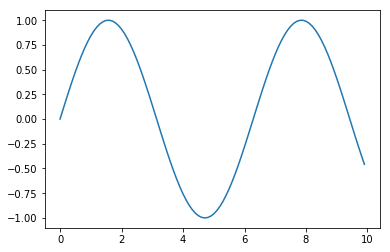

In [6]:
import numpy
import matplotlib.pyplot as plt

data = numpy.arange(0,10,0.1)
expr = sympy.sin(x)
val = sympy.lambdify(x, expr, "numpy")
print(data)
print(val(data))
plt.plot(data, val(data))
plt.show()


# Task
open up sypyder and reproduce the above so that you are happy using these new functions.



## Further reading

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.